# Author : Patil Linal Anil

# GRIP FEBRUARY 2022 - Sparks Foundation.

# Technical Task 01 : Prediction Using Supervised ML.

### In the task, we will predict the percentage of marks that a students is expected to score based on the number of hours they studied.

In [1]:
#Importing all the libraries required for the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data from dataset
url = "http://bit.ly/w-data"
score_data = pd.read_csv(url)
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#shape of data
score_data.shape

(25, 2)

In [4]:
#list of features
score_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#information about the dataset
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#description of dataset
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#finding missing values
score_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
#finding corelation of the data
score_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


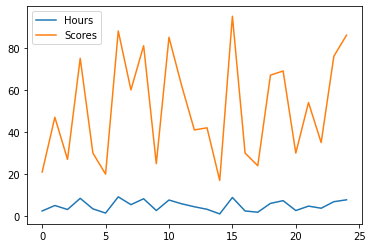

In [9]:
#simple line graph
score_data.plot()

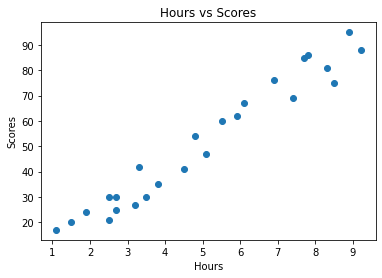

In [10]:
#scatter plot
plt.scatter(score_data['Hours'],score_data['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [11]:
#splitting input and output
x = score_data[['Hours']]
y = score_data.drop('Hours',axis = 1)
#splitting the data into training and testing(8:2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
x_train.shape, x_test.shape

((20, 1), (5, 1))

In [13]:
#importing linear regression
from sklearn.linear_model import LinearRegression
#instantiate the model
model = LinearRegression()
#fit the model
model.fit(x_train,y_train)

LinearRegression()

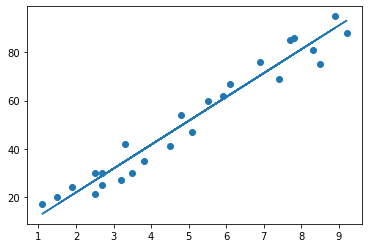

In [14]:
#plotting the regression line
line = model.coef_*x+model.intercept_
#ploting for the data
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [15]:
#prediction using model
y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

In [16]:
#calculating accuracy of model
acc_train = model.score(x_train,y_train)
acc_test = model.score(x_test,y_test)

In [17]:
#calculating root mean square error
from sklearn.metrics import mean_squared_error
rms_train = np.sqrt(mean_squared_error(y_train,y_train_prediction))
rms_test = np.sqrt(mean_squared_error(y_test,y_test_prediction))

In [18]:
print("LINEAR REGRESSION MODEL:")
print("Accuracy of Training Dataset: ",acc_train)
print("Accuracy of Testing Dataset: ",acc_test)
print("RMSE of Training Dataset: ",rms_train)
print("RMSE of Testing Dataset: ",rms_test)

LINEAR REGRESSION MODEL:
Accuracy of Training Dataset:  0.9515510725211552
Accuracy of Testing Dataset:  0.9454906892105356
RMSE of Training Dataset:  5.558613350226342
RMSE of Testing Dataset:  4.6474476121003665


In [19]:
#checking actual and predicted value
predicted = y_test_prediction[:,0]
actual = np.array(y_test['Scores'])
df_dict = {"Actual":actual,"Predicted":predicted}
df = pd.DataFrame(df_dict)
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Training data(Hours vs Scores)')

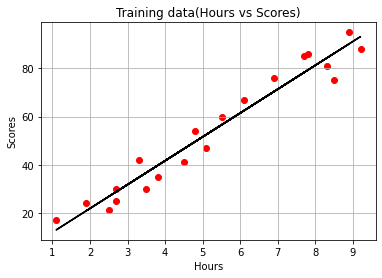

In [20]:
#plotting result for training dataset
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,y_train_prediction,color = 'black')
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Training data(Hours vs Scores)")

Text(0.5, 1.0, 'Testing data(Hours vs Scores)')

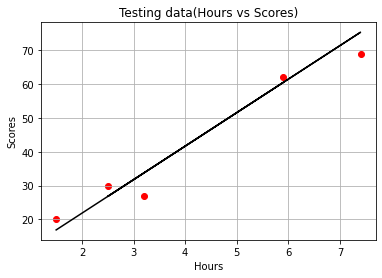

In [21]:
#plotting result for testing dataset
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,y_test_prediction,color = 'black')
plt.grid(True)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Testing data(Hours vs Scores)")

In [22]:
#predicting score of student if studied for 9.25 hrs/day
out = model.predict([[9.25]])
print("The predicted score of student if studied for 9.25 hrs/day is: ",out[0][0])

The predicted score of student if studied for 9.25 hrs/day is:  93.69173248737538


In [23]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_prediction))

Mean Absolute Error:  4.183859899002975
